In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from Bio.SeqUtils import MeltingTemp
from genslm_esm.dataset import read_fasta

/Users/abrace/src/genslm-esm/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
aminoacid_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v3_aminoacid_embeddings.npy")
codon_embeddings = np.load("./ec_embeddings_v1/ec_v1_contrastive_8m_v3_codon_embeddings.npy")
esm8m_embeddings = np.load("./ec_embeddings_v1/ec_v1_test_8m_esm2_aminoacid_embeddings.npy") 

labels = np.load("./ec_data_v1/ec_v1_test_labels.npy")
labels = np.array([".".join(label.split('.')[:2]) for label in labels]) # Only consider the first two EC levels (e.g., 1.1)
sequences = read_fasta("./ec_data_v1/ec_v1_test.fasta")
melting_points = [MeltingTemp.Tm_Wallace(seq.sequence, strict=False) for seq in sequences]

array([[<Axes: title={'center': 'Melting Point'}>]], dtype=object)

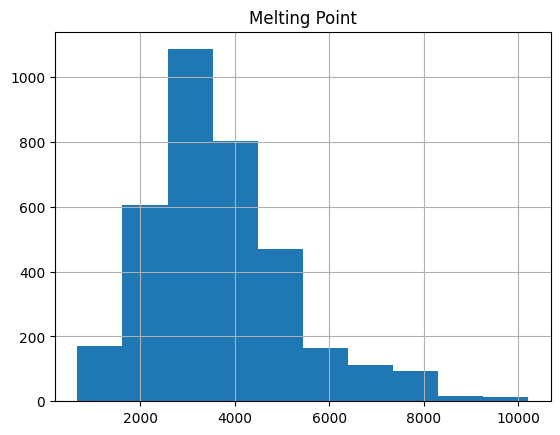

In [25]:
pd.DataFrame({"Melting Point": melting_points}).hist()

# ESM 8M performance on predicting GC content

In [26]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(esm8m_embeddings)

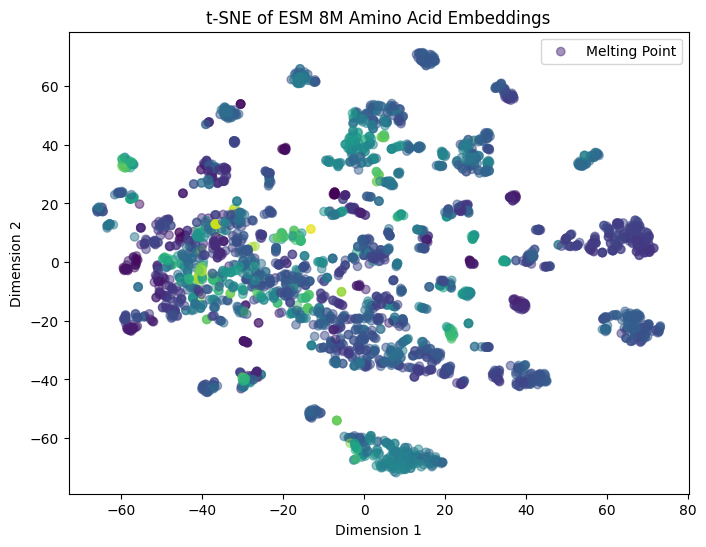

In [27]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=melting_points, cmap='viridis', alpha=0.5, label='Melting Point')

plt.title('t-SNE of ESM 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X, y = esm8m_embeddings, np.array(melting_points)
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

0.8752794322571449

# Contrastive 8M amino acid performance on predicting GC content

In [29]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(aminoacid_embeddings)

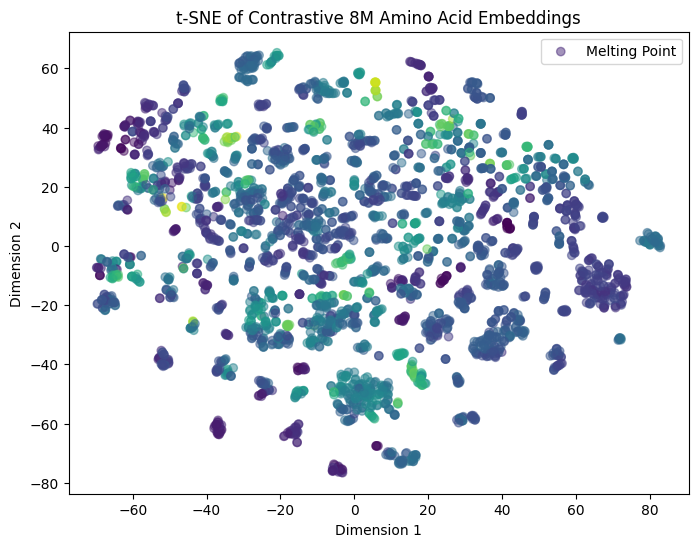

In [30]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=melting_points, cmap='viridis', alpha=0.5, label='Melting Point')

plt.title('t-SNE of Contrastive 8M Amino Acid Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X, y = aminoacid_embeddings, np.array(melting_points)
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

0.9286362028653474

# Contrastive 8M codon performance on predicting GC content

In [32]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(codon_embeddings)

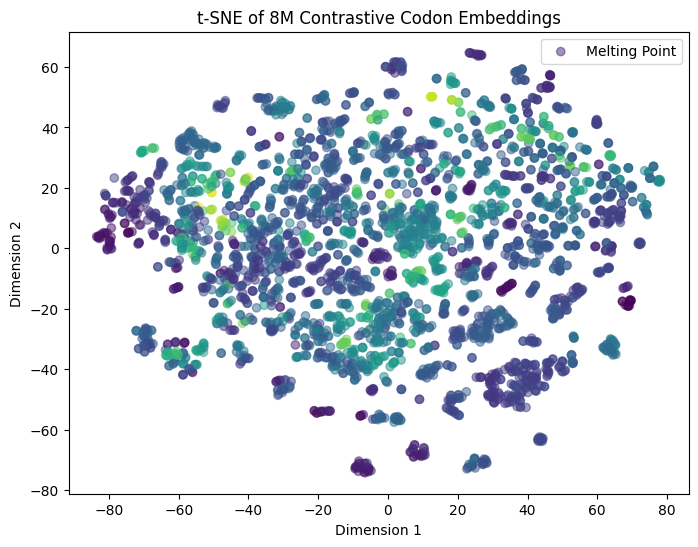

In [33]:
# Plot the t-SNE visualization with color-coded categorical labels
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=melting_points, cmap='viridis', alpha=0.5, label='Melting Point')

plt.title('t-SNE of 8M Contrastive Codon Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X, y = codon_embeddings, np.array(melting_points)
scaler = MinMaxScaler()
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

0.9195715193920209

# Contrastive (8M) v.s. ESM (8M) performance on predicting melting point

| Model                  | Score   |
|------------------------|---------|
| ESM 8M                 | 0.8752  |
| Contrastive 8M Amino Acid | 0.9333  |
| Contrastive 8M Codon   | 0.9316  |